Determine the mean square displacement of a one-dimensional random walk as a function of time and confirm the expected time dependence.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

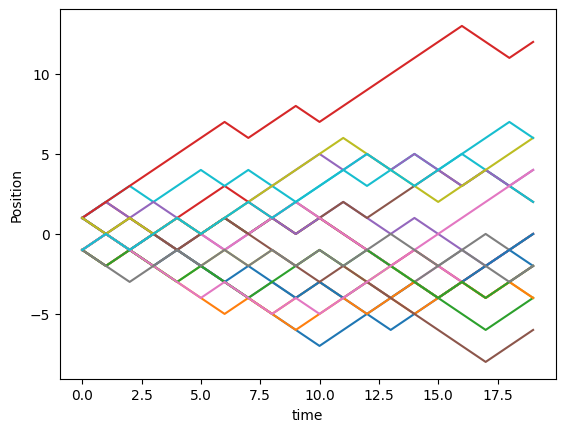

In [12]:
random_walks = []
for i in range(20):
    np.random.seed(i)
    steps = np.random.choice([1,-1], 20)
    position = np.cumsum(steps)
    random_walks.append(position)
    plt.plot(position)
    plt.xlabel("time")
    plt.ylabel("Position")

displacement = [p[-1] for p in random_walks]

def MSD_theoretical(D, delta_t):
    return np.sqrt(2*D*delta_t)